# Reading Datasets

In [69]:
import pandas as pd
company = pd.read_csv("E:\\Hackathon\\company.csv",)
company.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [70]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [71]:
company.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

# Data Cleaning

In [83]:
#Verify the uniqueness for company attribute
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [84]:
company['Company']=company.replace(to_replace=['Tata Consultancy Services','Infosys Pvt Lmt','Congnizant'],value=['TCS','Infosys','CTS'])

In [85]:
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [87]:
#Verify the uniqueness for Place attribute

company['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [88]:
#Verify the uniqueness for Country attribute

company['Country'].unique()

array(['India'], dtype=object)

In [89]:
company['Gender(M/F)']=company[['Gender']].replace(to_replace=[0,1],value=['F','M'])

In [90]:
company['Gender(M/F)'].unique()

array(['F', 'M'], dtype=object)

In [91]:
company.head()

,Company,Age,Salary,Place,Country,Gender,Gender(M/F)
0,TCS,20.0,NaN,Chennai,India,0,F
1,Infosys,30.0,NaN,Mumbai,India,0,F
2,TCS,35.0,2300.0,Calcutta,India,0,F
3,Infosys,40.0,3000.0,Delhi,India,0,F
4,TCS,23.0,4000.0,Mumbai,India,0,F


In [92]:
# Identifying the mean by company,Place & Gender

In [93]:
age = company[pd.notnull(company.Age)][['Company','Place','Gender(M/F)','Age']].groupby(['Company','Place','Gender(M/F)']).mean()

In [102]:
age.reset_index(inplace=True)

In [113]:
age.head()

,Company,Place,Gender(M/F),Age
0,CTS,Calcutta,F,23.000000
1,CTS,Calcutta,M,40.000000
2,CTS,Chennai,F,41.333333
3,CTS,Cochin,F,30.000000
4,CTS,Delhi,F,45.000000


In [107]:
age.groupby('Company').mean()

,Age
Company,
CTS,33.192593
Infosys,31.269414
TCS,28.265385


Note : Age mean by company are different here.

In [111]:
age.groupby('Place').mean().sort_values('Age')

,Age
Place,
Podicherry,22.333333
Chennai,24.583333
Bhopal,26.000000
Mumbai,28.250926
Cochin,28.500000
Calcutta,29.658730
Noida,31.625000
Nagpur,32.000000
Pune,32.500000


Note: Age mean by Place is drastically differ from each other while I compare the mean by company

In [114]:
age.groupby('Gender(M/F)').mean().sort_values('Age')

,Age
Gender(M/F),
F,30.179792
M,32.477778


In [ ]:
Note :  Mean Age by Gender is almost gives same

# Imputation of Numeric data by its mean

Imputing Age

In [130]:
company['Age'].mean()

30.484615384615385

In [134]:
company['Age'].fillna(company['Age'].mean(),inplace=True)

In [136]:
company.isnull().sum()

Company         8
Age             0
Salary         24
Place          14
Country         0
Gender          0
Gender(M/F)     0
dtype: int64

Imputing Salary

In [137]:
company['Salary'].mean()

5312.467741935484

In [138]:
company['Salary'].fillna(company['Salary'].mean(),inplace=True)

In [139]:
company['Salary'].mean()

5312.467741935484

In [140]:
company.isnull().sum()

Company         8
Age             0
Salary          0
Place          14
Country         0
Gender          0
Gender(M/F)     0
dtype: int64

# Imputation of Categorical data by its mode

In [142]:
#Imputing Company

company['Company'].mode()

0    TCS
dtype: object

In [197]:
company['Company'].fillna(company['Company'].mode(),inplace=True)

In [198]:
company['Company'].mode()

0    Mumbai
dtype: object

In [ ]:
#Imputing Place

In [152]:
company['Place'].mode()

0    Mumbai
dtype: object

In [201]:
company['Place'].fillna(0,inplace=True)

In [205]:
company['Place'].replace(to_replace=0,value='Mumbai',inplace=True)

In [206]:
company['Place'].mode()

0    Mumbai
dtype: object

In [207]:
company.isnull().sum()

Company        8
Age            0
Salary         0
Place          0
Country        0
Gender         0
Gender(M/F)    0
dtype: int64

# Dimensionality Reduction

In [273]:
company_mean=company.groupby(['Company']).agg('mean')

In [279]:
company_mean

,Age,Salary,Gender
Company,,,
CTS,31.631579,4794.109083,0.210526
Infosys,31.784615,5329.741935,0.148936
TCS,28.925035,5577.287390,0.309091


In [280]:
company_min_max=company.groupby(['Company']).agg(['min','max']).reset_index()


In [281]:
company_min_max

Company  Age        Salary             Place             Country         \
            min   max     min     max       min         max     min    max   
0      CTS  0.0  46.0  1089.0  9876.0  Calcutta        Pune   India  India   
1  Infosys  0.0  54.0  3000.0  8943.0    Bhopal  Podicherry   India  India   
2      TCS  0.0  38.0  2300.0  9024.0  Calcutta       Noida   India  India   

  Gender     Gender(M/F)      
     min max         min max  
0      0   1           F   M  
1      0   1           F   M  
2      0   1           F   M

# Visualisation

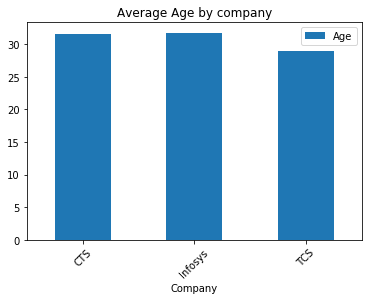

In [274]:
company_mean.plot(kind="bar",y='Age',rot=45,title="Average Age by company")
plt.show()

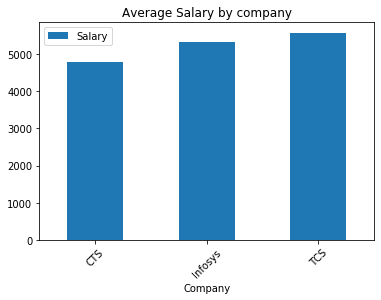

In [275]:
company_mean.plot(kind="bar",y='Salary',rot=45,title="Average Salary by company")
plt.show()

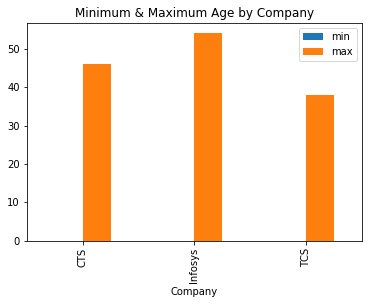

In [286]:
company_min_max.plot(kind='bar',x='Company',y='Age',title="Minimum & Maximum Age by Company")

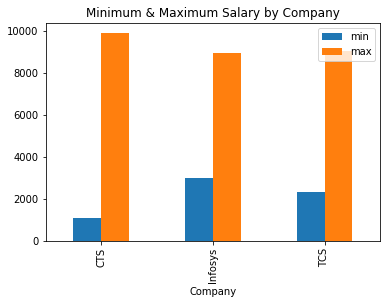

In [288]:
company_min_max.plot(kind='bar',x='Company',y='Salary',title="Minimum & Maximum Salary by Company")